# VS associations with cognitive performance (P) with an interaction with DRD2 polymorphism

***

In [21]:
import matplotlib.pyplot as plt
import ptitprince as pt
import pandas as pd
import numpy as np
import random
from scipy import stats
from statsmodels.compat import unicode
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from IPython.core.display import HTML


### Loading Datasets

In [38]:
# Loading data
data = pd.read_csv('DRD2_subset_data.csv', delimiter=',')
data = data.dropna(subset=['P','Q','VS','DRD2', 'AGE', 'female_1'])

# Loading second IGT only data (Reformatted)
IGT_data = pd.read_csv('DRD2_IGT_subset_data.csv', delimiter=',')
IGT_data = IGT_data.dropna(subset=['IGT_scores', 'DRD2'])

### Reformatting Data

In [39]:
# Changing Categorical data to integers
data['DRD2'] = data['DRD2'].astype(int)
data['female_1'] = data['female_1'].astype(int)
IGT_data['DRD2'] = IGT_data['DRD2'].astype(int)

# Changing DRD2 data to category type
data['DRD2_cat'] = pd.cut(data['DRD2'], range(-1,2,1), labels=['Ins/Ins Carrier', 'Non-Carrier'])
data['DRD2_cat'] = data['DRD2_cat'].astype('object')
IGT_data['DRD2_cat'] = pd.cut(IGT_data['DRD2'], range(-1,2,1), labels=['Ins/Ins Carrier', 'Non-Carrier'])
IGT_data['DRD2_cat'] = IGT_data['DRD2_cat'].astype('object')

# Splitting data based on DRD2 polymorphism
low = data[data['DRD2'] == 1] # Low D2 Receptors
normal = data[data['DRD2'] == 0] # Normal D2 Receptors

## Distribution Plots

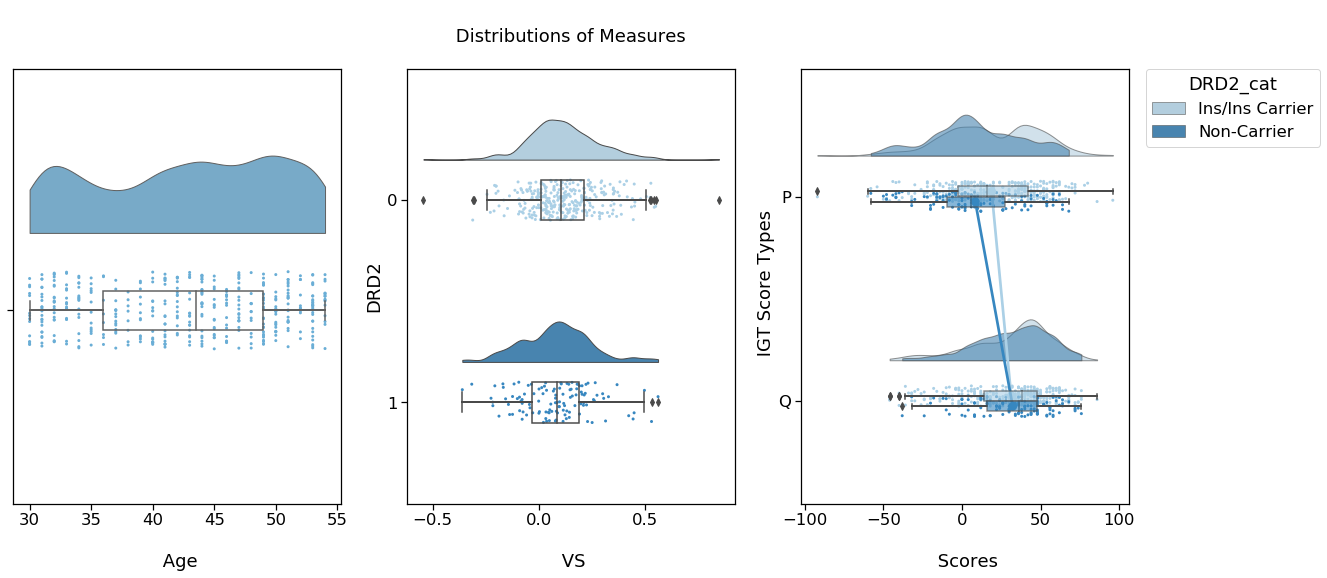

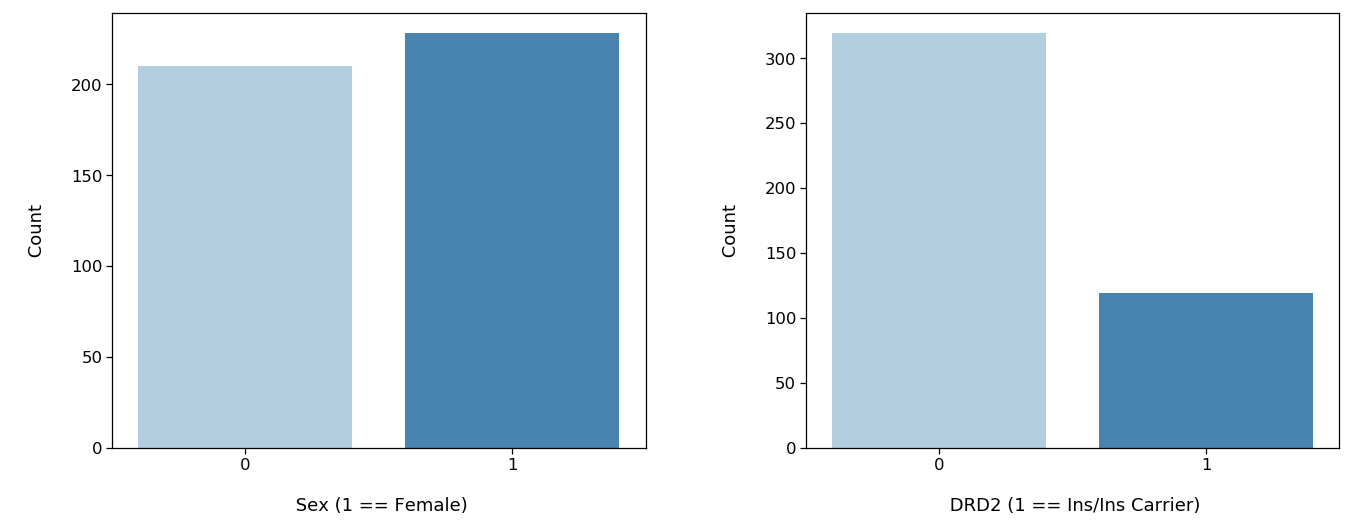

In [76]:
# Setting style of figures
sns.set_context("notebook", font_scale=1.5)

# Configuring 1st row of grid of plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.set_figheight(8)
fig.set_figwidth(20)

# Age Rain Cloud Plot
ax = fig.add_subplot(1, 3, 1)
age = pt.RainCloud(y='AGE', orient='h',data=data, width_viol=.4, width_box=.1, figsize=(7,5), 
                   palette="Blues",ax=ax)
age.set(xlabel='\n Age')

# VS Rain Cloud Plot
ax = fig.add_subplot(1, 3, 2)
VS = pt.RainCloud(y='VS', x='DRD2', data=data, orient='h', width_viol=.4, width_box=.2, figsize=(7,5), 
                  palette="Blues", ax=ax)
VS.set(xlabel='\n VS', title='\n Distributions of Measures \n')

# IGT Scores Rain Cloud Plots
ax = fig.add_subplot(1, 3, 3)
IGT = pt.RainCloud(y='IGT_scores', x='IGT_score_type', hue='DRD2_cat', data=IGT_data, orient='h', 
                         width_viol=.4, width_box=.1, figsize=(7,5), palette='Blues', alpha=.6, ax=ax,
                          dodge=True, pointplot=True) #Can comment out if lines aren't helpful
IGT.set(xlabel='\n Scores', ylabel='\n IGT Score Types')

# Configuring 2nd row of grid of plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.3)
fig.set_figheight(8)
fig.set_figwidth(22)

# Sex Bar Plot
ax = fig.add_subplot(1, 2, 1)
sex = sns.catplot(x="female_1", kind="count", data=data, palette="Blues", ax=ax)
ax.set(xlabel='\n Sex (1 == Female)', ylabel='\n Count \n')

# DRD2 Bar Plot
ax = fig.add_subplot(1, 2, 2)
DRD2 = sns.catplot(x="DRD2", kind="count", data=data, palette="Blues", ax=ax)
ax.set(xlabel='\n DRD2 (1 == Ins/Ins Carrier)', ylabel='\n Count \n')
plt.close(3)
plt.close(4)
plt.show()

***


# T-Tests

### T-Test between DRD2 vs P and Q

In [6]:
t_test_results = stats.ttest_ind(low.iloc[:,2:5], normal.iloc[:,2:5], equal_var=True)
cols = ['P', 'Q', 'VS']
pd.DataFrame({'Statistics':t_test_results.statistic[0:], 'P-values':t_test_results.pvalue}, cols)


,Statistics,P-values
P,-3.230837,0.001328
Q,0.539049,0.590128
VS,-1.771730,0.077138


In [7]:
stats.ttest_ind?

### Linear Regression Plots

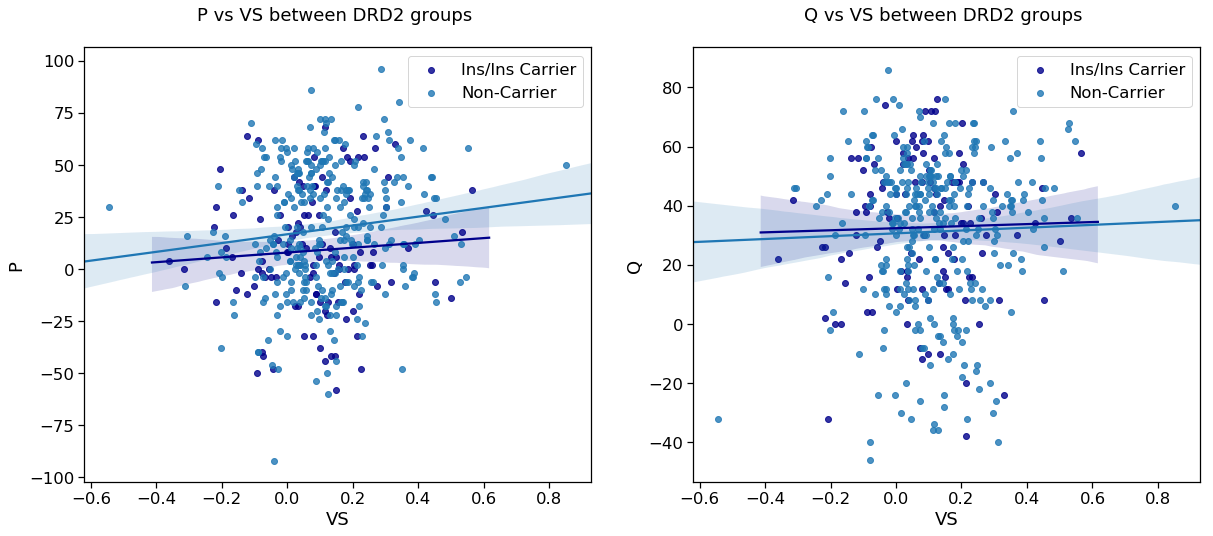

In [8]:
# Configuring grid of plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.set_figheight(8)
fig.set_figwidth(20)

# P vs VS between DRD2 groups Scatter Plot
ax = fig.add_subplot(1, 2, 1)
scatter_P_low = sns.regplot(x='VS', y='P', data=low, label='Ins/Ins Carrier', color="darkblue", ax=ax).legend()
scatter_P_normal = sns.regplot(x='VS', y='P', data=normal, label='Non-Carrier').legend()
ax.set(title='P vs VS between DRD2 groups \n')

# Q vs VS between DRD2 groups Scatter Plot
ax = fig.add_subplot(1, 2, 2)
scatter_Q_low = sns.regplot(x='VS', y='Q', data=low, label='Ins/Ins Carrier', color="darkblue", ax=ax).legend()
scatter_Q_normal = sns.regplot(x='VS', y='Q', data=normal, label='Non-Carrier').legend()
ax.set(title='Q vs VS between DRD2 groups \n')
plt.show()

*****


# Linear Regression

## P ~ DRD2 + VS + DRD2 * VS

In [9]:
results_P = smf.ols(formula='P ~ DRD2 + VS + DRD2 * VS',data=data).fit()
HTML(results_P.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.7039,2.020,8.269,0.000,12.733,20.674
DRD2,-8.7905,3.634,-2.419,0.016,-15.932,-1.649
VS,21.1400,10.020,2.110,0.035,1.447,40.833
DRD2:VS,-9.5730,18.830,-0.508,0.611,-46.582,27.436


## Q ~ DRD2 + VS + DRD2 * VS

In [10]:
results_Q = smf.ols(formula='Q ~ DRD2 + VS + DRD2 * VS',data=data).fit()
HTML(results_Q.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,30.6606,1.746,17.563,0.000,27.230,34.092
DRD2,1.7348,3.140,0.553,0.581,-4.437,7.906
VS,4.7830,8.658,0.552,0.581,-12.234,21.801
DRD2:VS,-1.3082,16.272,-0.080,0.936,-33.289,30.673


***

### Slope Comparison Between Groups

In [42]:
carrier = data[data['DRD2'] == 1]
noncarrier = data[data['DRD2'] == 0] 

## P ~  VS

#### Ins/Ins Carriers

In [15]:
results_P_carrier = smf.ols(formula='P ~ VS',data=carrier).fit()
HTML(results_P_carrier.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.9134,2.939,2.692,0.008,2.092,13.734
VS,11.5671,15.515,0.746,0.457,-19.159,42.293


#### Non-Carriers

In [16]:
results_P_noncarrier = smf.ols(formula='P ~ VS', data=noncarrier).fit()
HTML(results_P_noncarrier.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.7039,2.040,8.189,0.000,12.691,20.717
VS,21.1400,10.117,2.090,0.037,1.235,41.045


## Q ~  VS

#### Ins/Ins Carriers

In [17]:
results_Q_carrier = smf.ols(formula='Q ~ VS',data=carrier).fit()
HTML(results_Q_carrier.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,32.3955,2.426,13.353,0.000,27.591,37.200
VS,3.4748,12.806,0.271,0.787,-21.887,28.837


#### Non-Carriers

In [18]:
results_Q_noncarrier = smf.ols(formula='Q ~ VS',data=noncarrier).fit()
HTML(results_Q_noncarrier.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,30.6606,1.789,17.139,0.000,27.141,34.180
VS,4.7830,8.873,0.539,0.590,-12.674,22.240


In [57]:
np.random.seed(123)

def permutationTest(y, diff):
    
    diff_collection = []
    greaterDiff_count = 0
    total = 1500
    sample_size = 438
    
    for i in range(0, total):
        
        # Randomizing DRD2 Assignment
        DRD2_rand = np.random.choice(np.array(data['DRD2']), 438, replace = False)
        VS = np.array(data['VS'])
        y_data = np.array(data[y])
        perm_data = pd.DataFrame({'DRD2_rand':DRD2_rand, 'VS':VS, 'y':y_data})
        
        # Splitting by DRD2 Assignment
        carrier_rand_data = perm_data[perm_data['DRD2_rand'] == 1]
        noncarrier_rand_data = perm_data[perm_data['DRD2_rand'] == 0]
 
        # Carrier Linear Regression
        carrier_rand_res = smf.ols(formula = 'y ~ VS', data=carrier_rand_data).fit()
        carrier_coef = carrier_rand_res.params[1]
        
        # Non-Carrier Linear Regression
        noncarrier_rand_res = smf.ols(formula = 'y ~ VS', data=noncarrier_rand_data).fit()
        noncarrier_coef = noncarrier_rand_res.params[1]
        
        # Calculating Permuted Difference
        rand_diff = noncarrier_coef - carrier_coef
        
        # Collecting Permuted Differences
        diff_collection.append(rand_diff)
        
        # Counting Greater Permuted Differences 
        if rand_diff > diff:
            greaterDiff_count += 1
    
    # Calculating Fraction of Greater Permuted Differences
    PVal  = greaterDiff_count / total
    
    plt.hist(diff_collection, bins=25, edgecolor='k')
    plt.axvline(x=diff, color='black', linestyle='dashed')
    
    return PVal

0.30266666666666664

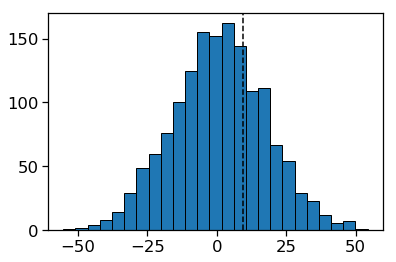

In [58]:
difference = results_P_noncarrier.params[1] - results_P_carrier.params[1]
permutationTest('P', difference)

0.4646666666666667

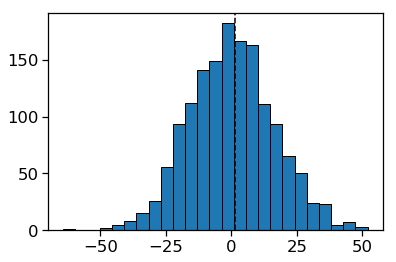

In [59]:
difference = results_Q_noncarrier.params[1] - results_Q_carrier.params[1]
permutationTest('Q', difference)